In [1]:
from keras.datasets import mnist

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋: {} / 테스트셋: {}".format(X_train.shape[0], X_test.shape[0]))

Using TensorFlow backend.


학습셋: 60000 / 테스트셋: 10000


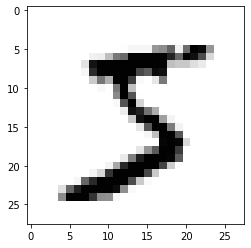

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [3]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [4]:
from keras.utils import np_utils

import numpy as np

X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = ''.join([MODEL_DIR, "{epoch:02d}-{val_loss:.4f}.hdf5"])
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.14936, saving model to ./model/01-0.1494.hdf5

Epoch 00002: val_loss improved from 0.14936 to 0.10112, saving model to ./model/02-0.1011.hdf5

Epoch 00003: val_loss improved from 0.10112 to 0.08427, saving model to ./model/03-0.0843.hdf5

Epoch 00004: val_loss improved from 0.08427 to 0.07885, saving model to ./model/04-0.0789.hdf5

Epoch 00005: val_loss improved from 0.07885 to 0.06757, saving model to ./model/05-0.0676.hdf5

Epoch 00006: val_loss improved from 0.06757 to 0.06261, saving model to ./model/06-0.0626.hdf5

Epoch 00007: val_loss did not improve from 0.06261

Epoch 00008: val_loss improved from 0.06261 to 0.06003, saving model to ./model/08-0.0600.hdf5

Epoch 00009: val_loss did not improve from 0.06003

Epoch 00010: val_loss improved from 0.06003 to 0.05919, saving model to ./model/10-0.0592.hdf5

Epoch 00011: val_loss improved from 0.05919 to 0.05895, saving model to ./model/11-0.0590.hdf5

Epoch 00012: val_loss did not impro

In [8]:
print("Accuracy: {}".format(model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 0s 45us/step
Accuracy: 0.984000027179718


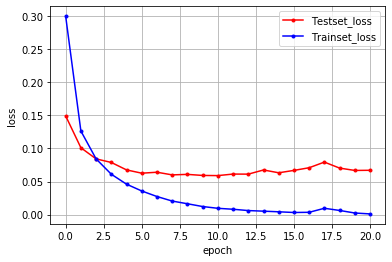

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
from keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D

del X_train, X_test, Y_train, Y_test

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

del model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
import os
import glob

del checkpointer, early_stopping_callback

files = glob.glob(''.join([MODEL_DIR, "*"]))
for f in files:
    os.remove(f)

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = ''.join([MODEL_DIR, "{epoch:02d}-{val_loss:.4f}.hdf5"])
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05817, saving model to ./model/01-0.0582.hdf5

Epoch 00002: val_loss improved from 0.05817 to 0.04013, saving model to ./model/02-0.0401.hdf5

Epoch 00003: val_loss improved from 0.04013 to 0.03416, saving model to ./model/03-0.0342.hdf5

Epoch 00004: val_loss improved from 0.03416 to 0.03185, saving model to ./model/04-0.0318.hdf5

Epoch 00005: val_loss did not improve from 0.03185

Epoch 00006: val_loss improved from 0.03185 to 0.02680, saving model to ./model/06-0.0268.hdf5

Epoch 00007: val_loss did not improve from 0.02680

Epoch 00008: val_loss did not improve from 0.02680

Epoch 00009: val_loss did not improve from 0.02680

Epoch 00010: val_loss improved from 0.02680 to 0.02632, saving model to ./model/10-0.0263.hdf5

Epoch 00011: val_loss did not improve from 0.02632

Epoch 00012: val_loss did not improve from 0.02632

Epoch 00013: val_loss did not improve from 0.02632

Epoch 00014: val_loss did not improve from 0.02632

Epoch 00015

In [13]:
print("Accuracy: {}".format(model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 5s 494us/step
Accuracy: 0.992900013923645


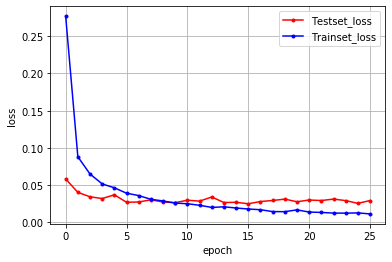

In [14]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()